In [1]:
import uproot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import awkward as ak
import numpy as np
import math
import ROOT as root
from array import array

Welcome to JupyROOT 6.26/16


In [2]:
#Now we have supposedly matching reco and edep-sim files!
edep_sim_file = uproot.open("/sdf/home/t/tanaka/MicroProdN4p1_NDComplex_FHC.spill.full.0002459.EDEPSIM_SPILLS.root")
tms_reco_file = uproot.open("/sdf/home/t/tanaka/MicroProdN4p1_NDComplex_FHC.tmsreco.full.0002459.TMSRECO.root")

In [3]:
#event no and event id seems to not be matching up exactly, could be cuz different info stored. Run numbers matching!
edep_sim_events = edep_sim_file['EDepSimEvents']
edep_sim_evt_ids = edep_sim_events['Event']['EventId'].arrays().EventId
tms_reco_truth_events = tms_reco_file['Truth_Info']
tms_reco_evt_ids = tms_reco_truth_events['EventNo']
print(np.size(tms_reco_file['Truth_Info']['RunNo'].arrays()))
print(np.size(edep_sim_events['RunId'].arrays()))

1266
5978


In [4]:
#Let's check neutrino vertices - perhaps should confidently tell us. 
edep_sim_true_pdgids = edep_sim_file['DetSimPassThru']['gRooTracker']['StdHepPdg'].arrays()
edep_sim_true_nuvtx = edep_sim_file['DetSimPassThru']['gRooTracker']['StdHepX4'].arrays()
tms_reco_truth_events['NeutrinoX4'].arrays().NeutrinoX4
#fascinating, there is a different number of neutrino vertices in this file compared to edep-sim - and the ones present don't seem  to match. 

<Array [[-0.641, 2.37, 8.07, 0.73], ..., [3.05, ...]] type='1266 * 4 * float32'>

In [5]:
#This is once again pulling what I thought where the true neutrino vertices - clearly they are not :(
true_neutrino_x = edep_sim_true_nuvtx.StdHepX4[0:,0,0]
true_neutrino_z = edep_sum_true_nuvtx.StdHepX4[0:,0,2]
edep_sim_true_nuvtx.StdHepX4
plt.scatter(true_neutrino_z, true_neutrino_x, s = 3)
plt.xlabel("vertex z (m)")
plt.ylabel("vertex x (m)")
plt.title("'Neutrino Vertex' from edep-sim gRooTracker?'")
#ok, so this shows that the StdHepX4 is not holding the neutrino vertices, despite the pdgid??

NameError: name 'edep_sum_true_nuvtx' is not defined

Text(0.5, 1.0, 'Truth neutrino vertex from reconstructed file')

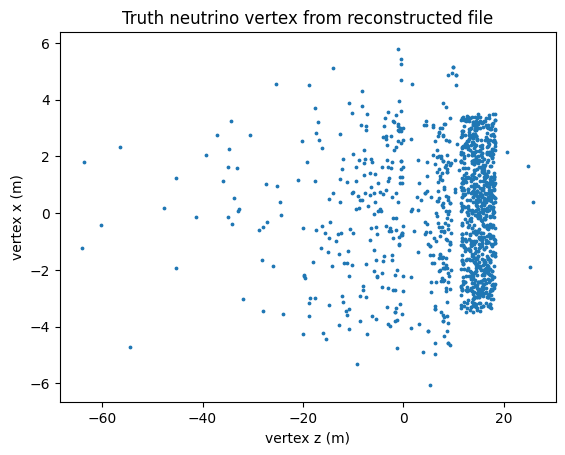

In [6]:
#This looks like what we would actually be expecting... 
true_neutrino_x_reco = tms_reco_truth_events['NeutrinoX4'].arrays().NeutrinoX4[0:,0]
true_neutrino_z_reco = tms_reco_truth_events['NeutrinoX4'].arrays().NeutrinoX4[0:,2]
#true_neutrino_energy_reco = tms_reco_truth_events['NeutrinoP4'].arrays().NeutrinoP4[0:,0]
plt.scatter(true_neutrino_z_reco, true_neutrino_x_reco, s= 3)
plt.xlabel("vertex z (m)")
plt.ylabel("vertex x (m)")
plt.title("Truth neutrino vertex from reconstructed file")
#we can also add some 

In [273]:
edep_sim_file['EDepSimEvents'].keys()

['Event',
 'Event/TObject',
 'Event/TObject/fUniqueID',
 'Event/TObject/fBits',
 'Event/RunId',
 'Event/EventId',
 'Event/Primaries',
 'Event/Primaries/Primaries.fUniqueID',
 'Event/Primaries/Primaries.fBits',
 'Event/Primaries/Primaries.Particles',
 'Event/Primaries/Primaries.Informational',
 'Event/Primaries/Primaries.Position',
 'Event/Primaries/Primaries.GeneratorName',
 'Event/Primaries/Primaries.Reaction',
 'Event/Primaries/Primaries.Filename',
 'Event/Primaries/Primaries.InteractionNumber',
 'Event/Primaries/Primaries.CrossSection',
 'Event/Primaries/Primaries.DiffCrossSection',
 'Event/Primaries/Primaries.Weight',
 'Event/Primaries/Primaries.Probability',
 'Event/Trajectories',
 'Event/Trajectories/Trajectories.fUniqueID',
 'Event/Trajectories/Trajectories.fBits',
 'Event/Trajectories/Trajectories.Points',
 'Event/Trajectories/Trajectories.TrackId',
 'Event/Trajectories/Trajectories.ParentId',
 'Event/Trajectories/Trajectories.Name',
 'Event/Trajectories/Trajectories.PDGCode',


In [274]:
edep_sim_file['DetSimPassThru']['gRooTracker'].keys()

['EvtFlags',
 'EvtFlags/TObject',
 'EvtFlags/fNbits',
 'EvtFlags/fNbytes',
 'EvtFlags/fAllBits',
 'EvtCode',
 'EvtCode/TObject',
 'EvtCode/fString',
 'EvtNum',
 'EvtXSec',
 'EvtDXSec',
 'EvtKPS',
 'EvtWght',
 'EvtProb',
 'EvtVtx',
 'StdHepN',
 'StdHepPdg',
 'StdHepStatus',
 'StdHepRescat',
 'StdHepX4',
 'StdHepP4',
 'StdHepPolz',
 'StdHepFd',
 'StdHepLd',
 'StdHepFm',
 'StdHepLm']

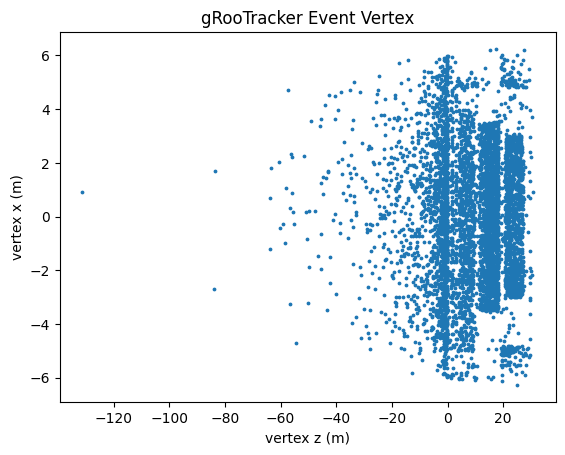

<Array [[-0.641, 2.37, 8.07, 0.73], ..., [3.27, ...]] type='5978 * 4 * float64'>

In [7]:
true_neutrino_x_edep = edep_sim_file['DetSimPassThru']['gRooTracker']['EvtVtx'].arrays().EvtVtx[0:,0]
true_neutrino_z_edep = edep_sim_file['DetSimPassThru']['gRooTracker']['EvtVtx'].arrays().EvtVtx[0:,2]
plt.scatter(true_neutrino_z_edep, true_neutrino_x_edep, s = 3)
plt.xlabel("vertex z (m)")
plt.ylabel("vertex x (m)")
plt.title("gRooTracker Event Vertex")
plt.show()
#Bang! Seems like this is actually all the neutrino vertices!
edep_sim_file['DetSimPassThru']['gRooTracker']['EvtVtx'].arrays().EvtVtx

Text(0.5, 1.0, 'gRooTracker Event Vertex - NDLAr Zoom')

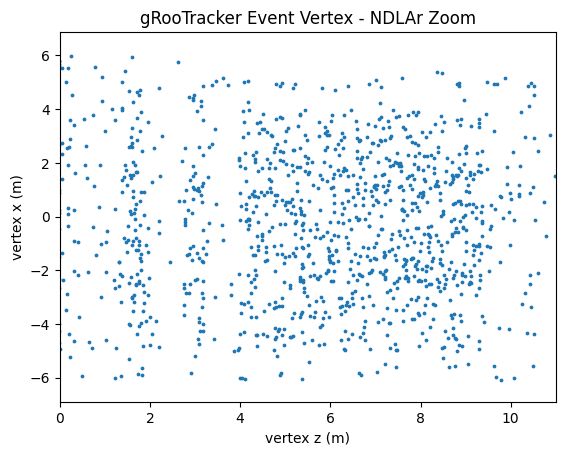

In [8]:
plt.scatter(true_neutrino_z_edep, true_neutrino_x_edep, s = 3)
plt.xlabel("vertex z (m)")
plt.xlim(0,11)
plt.ylabel("vertex x (m)")
plt.title("gRooTracker Event Vertex - NDLAr Zoom")
#you can see the cryostat surrounding here which is pretty cool

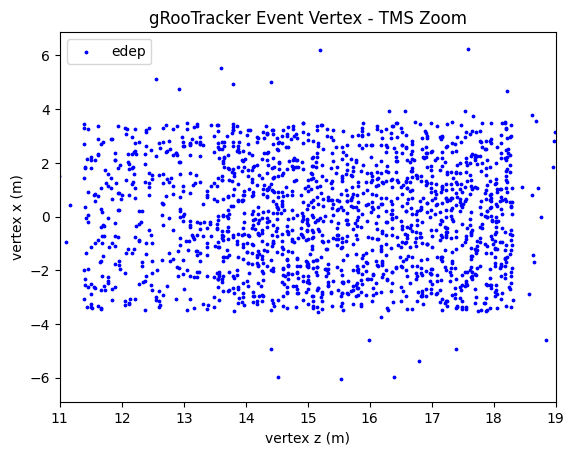

In [11]:
plt.scatter(true_neutrino_z_edep, true_neutrino_x_edep, s = 3, c = 'blue', label = 'edep')
#plt.scatter(true_neutrino_z_reco, true_neutrino_x_reco, s= 3, c = 'red', label = 'reco')
plt.xlabel("vertex z (m)")
plt.xlim(11,19)
plt.ylabel("vertex x (m)")
plt.title("gRooTracker Event Vertex - TMS Zoom")
plt.legend()

In [12]:
#this is way too slow!! Don't use
gRoo_2d_vtxs = np.column_stack((true_neutrino_z_edep, true_neutrino_x_edep))
reco_2d_vtxs = np.column_stack((true_neutrino_z_reco, true_neutrino_x_reco))
reco_with_match = []
for reco_2d_vtx in reco_2d_vtxs:
    for gRoo_2d_vtx in gRoo_2d_vtxs:
        z_dif = abs(reco_2d_vtx[0] - gRoo_2d_vtx[0])
        x_dif = abs(reco_2d_vtx[1] - gRoo_2d_vtx[1])
        if (z_dif < 0.0001) and (x_dif < 0.0001):
            print("Found match!")
            reco_with_match.append(reco_2d_vtx)
            continue
         

Found match!
Found match!
Found match!
Found match!
Found match!
Found match!
Found match!
Found match!
Found match!
Found match!
Found match!
Found match!
Found match!
Found match!
Found match!
Found match!
Found match!
Found match!
Found match!
Found match!
Found match!
Found match!
Found match!
Found match!
Found match!
Found match!
Found match!
Found match!
Found match!
Found match!
Found match!


KeyboardInterrupt: 

In [ ]:
gRoo_2d_vtxs[0][0]

In [135]:
reco_2d_vtxs[0][0]

np.float32(8.073999)

In [14]:
#checking for duplication.
np.unique(edep_sim_file['DetSimPassThru']['gRooTracker']['EvtVtx'].arrays().EvtVtx[0:])

<Array [-131, -83.8, -83.6, ..., 1.44e+10, 1.44e+10] type='23912 * float64'>

In [13]:
np.unique(tms_reco_truth_events['NeutrinoX4'].arrays().NeutrinoX4[0:])

<Array [-63.9, -63.6, -60.2, ..., 1.44e+10, 1.44e+10] type='3785 * float32'>

In [21]:
tms_reco_truth_events['NeutrinoX4'].arrays().NeutrinoX4[0:,3]

<Array [0.73, 95.9, 76.4, ..., 1.44e+10, 1.44e+10] type='1266 * float32'>

In [48]:
edep_original = edep_sim_file['DetSimPassThru']['gRooTracker']['EvtVtx'].arrays().EvtVtx
tms_reco_truth_events['NeutrinoX4'].arrays().NeutrinoX4

<Array [[-0.641, 2.37, 8.07, 0.73], ..., [3.05, ...]] type='1266 * 4 * float32'>

In [110]:
edep_sim_file['DetSimPassThru']['gRooTracker']['EvtVtx'].arrays().EvtVtx

<Array [[-0.641, 2.37, 8.07, 0.73], ..., [3.27, ...]] type='5978 * 4 * float64'>

In [82]:
#in depth on one duplicate event in tms-recon
print(tms_reco_truth_events['NeutrinoX4'].arrays().NeutrinoX4[4][3])
print(tms_reco_truth_events['NeutrinoX4'].arrays().NeutrinoX4[5][3])

361.8606
361.8606


In [83]:
edep_xs = edep_sim_file['DetSimPassThru']['gRooTracker']['EvtVtx'].arrays().EvtVtx[0:,1]
print(np.where(ak.values_astype(edep_sim_file['DetSimPassThru']['gRooTracker']['EvtVtx'].arrays().EvtVtx[0:,1], np.float32) == 361.8606))
#print(edep_sim_file['DetSimPassThru']['gRooTracker']['EvtVtx'].arrays().EvtVtx[12])
#edep_sim_file['DetSimPassThru']['gRooTracker']['EvtVtx'].arrays().EvtVtx[12][1]
edep_sim_file['DetSimPassThru']['gRooTracker']['EvtVtx'].arrays().EvtVtx[12][3]

#these seem to just be duplicates. Can take a closer look at what is happening in event index [12] for edep-sim

(<Array [] type='0 * int64'>,)


np.float64(361.86060775234364)

In [182]:
#edep_sim_file['EDepSimEvents']['Event']['Trajectories']['Trajectories.PDGCode'].arrays()[0].tolist()

In [84]:
#checking to ensure there are unique entries even with lowering datatype
np.unique(ak.values_astype(edep_sim_file['DetSimPassThru']['gRooTracker']['EvtVtx'].arrays().EvtVtx[0:,3], np.float32))

<Array [0.73, 19.3, 76.4, ..., 1.44e+10, 1.44e+10] type='769 * float32'>

Ok this may be a little bit of a jump but lets mess around with the sort of event by event information we can grab that we would need for a timing study. 

In [7]:
#Get the edep-file
edep_file = root.TFile("/sdf/home/t/tanaka/MicroProdN4p1_NDComplex_FHC.spill.full.0002459.EDEPSIM_SPILLS.root") 

#events tree
edep_evts = edep_file.Get("EDepSimEvents") 
total_events = edep_evts.GetEntries()

In [42]:
#This is how we could fill up a lookup table with neutrino vertex info for each event. 
#detsim tree to get vertices
edep_detsim = edep_file.Get("DetSimPassThru") #detsimpassthru directory
gRooTrackerTree = edep_detsim.gRooTracker #get the proper tree
edep_true_neutrino_vtx = np.zeros((total_events, 5))
vtxs = array('d', [0.0]*4)  # 'd' for double
gRooTrackerTree.SetBranchAddress("EvtVtx", vtxs)
for i in range(gRooTrackerTree.GetEntries()):
    gRooTrackerTree.GetEntry(i)
    edep_true_neutrino_vtx[i][0] = int(i)
    edep_true_neutrino_vtx[i][1] = vtxs[0]
    edep_true_neutrino_vtx[i][2] = vtxs[1]
    edep_true_neutrino_vtx[i][3] = vtxs[2]
    edep_true_neutrino_vtx[i][4] = vtxs[3]
    
print(edep_true_neutrino_vtx)
np.shape(edep_true_neutrino_vtx)

[[ 0.00000000e+00 -6.41077300e-01  2.36830588e+00  8.07399955e+00
   7.29972019e-01]
 [ 1.00000000e+00 -2.12884227e+00  2.50215264e+00  3.98519740e+00
   1.92659910e+01]
 [ 2.00000000e+00 -8.71490993e-01 -2.60846549e+00 -1.98303385e+00
   7.64062234e+01]
 ...
 [ 5.97500000e+03  3.04796505e+00 -2.41270466e+00  1.65856064e+01
   1.44000099e+10]
 [ 5.97600000e+03  1.26078503e+00  2.70022842e+00 -4.22940909e+00
   1.44000099e+10]
 [ 5.97700000e+03  3.26545637e+00 -7.92363242e-01  1.14482838e+01
   1.44000099e+10]]


(5978, 5)

In [9]:
#Now lets take a look at the hit segments:
edep_evt = root.TG4Event()
edep_evts.SetBranchAddress("Event",root.AddressOf(edep_evt))
edep_evts.GetEntries() #this is just to check the number of entries again

5978

In [29]:
neutrino_number = 0 #this will be how we iterate I think

edep_evts.GetEntry(neutrino_number) #the 0th event, associated with the 0th neutrino vertex, just as a proof of concept!
hit_segments = edep_evt.SegmentDetectors['volTMS'] #the hit segment associated with the 0th event, in the TMS
#when this eventually is looping over all of our hit-segments we will want to make sure that we are first checking that the hit_segment.size() is non-zero
edep_evt.EventId


0

In [41]:
#Let's fill an array with the TMS hit information associated with our 0th event
#can use the class!

#Expanding on this class is going to be the best way to implement detector classes:
#Right now all it does is average the position to center our hit segment 
#Return energy deposition (primary and secondary - though don't think secondary is set up)
#To do --> implement geometry finder! implement actual rec effects
class TMS_hit_simple:
    def __init__(self, tms_hit_seg):
        self.tms_hit_seg = tms_hit_seg
    def GetHitX(self):
        x_pos = (self.tms_hit_seg.GetStart()[0] + self.tms_hit_seg.GetStop()[0]) / 2 
        return(x_pos)
    def GetHitY(self):
        y_pos = (self.tms_hit_seg.GetStart()[1] + self.tms_hit_seg.GetStop()[1]) / 2
        return(y_pos)
    def GetHitZ(self):
        z_pos = (self.tms_hit_seg.GetStart()[2] + self.tms_hit_seg.GetStop()[2]) / 2
        return(z_pos)
    def GetHitT(self):
        time = (self.tms_hit_seg.GetStart()[3] + self.tms_hit_seg.GetStop()[3]) / 2
        return(time)
    def GetPrimaryDeposit(self):
        PrimaryDeposit = self.tms_hit_seg.GetEnergyDeposit()
        return(PrimaryDeposit)
    def GetSecondaryDeposit(self):
        SecondaryDeposit = self.tms_hit_seg.GetSecondaryDeposit()
        return(SecondaryDeposit)

print(hit_segments.size())

hits_in_evt = np.zeros((hit_segments.size(),6)) 

for i in range(hit_segments.size()):
    hit = TMS_hit_simple(hit_segments[i])
    hits_in_evt[i][0] = neutrino_number
    hits_in_evt[i][1] = hit.GetHitX()
    hits_in_evt[i][2] = hit.GetHitY()
    hits_in_evt[i][3] = hit.GetHitZ()
    hits_in_evt[i][4] = hit.GetHitT()
    hits_in_evt[i][5] = hit.GetPrimaryDeposit()
    #hits_in_evt[i][6] = hit.GetSecondaryDeposit()

print(hits_in_evt)
    
    

7
[[ 0.00000000e+00 -1.07697048e+03 -8.11246776e+02  1.15853580e+04
   5.31866962e+01  8.90271783e-01]
 [ 0.00000000e+00 -1.07509149e+03 -8.11487970e+02  1.15877614e+04
   5.31969483e+01  3.45225111e-02]
 [ 0.00000000e+00 -1.07367322e+03 -8.12505365e+02  1.15891517e+04
   5.32042887e+01  6.99842811e-01]
 [ 0.00000000e+00 -1.07160242e+03 -8.15037805e+02  1.15911990e+04
   5.32173826e+01  6.31867349e-01]
 [ 0.00000000e+00 -1.07050313e+03 -8.17818712e+02  1.15924368e+04
   5.32282260e+01  4.78640527e-01]
 [ 0.00000000e+00 -1.07012628e+03 -8.19069038e+02  1.15929861e+04
   5.32330817e+01  1.16796596e-02]
 [ 0.00000000e+00 -1.07193539e+03 -8.13389958e+02  1.15905997e+04
   5.32130963e+01  4.28769797e-01]]


In [1]:
plt.scatter(hits_in_evt[0:,3],hits_in_evt[0:,1])

NameError: name 'plt' is not defined

In [2]:
edep_sim_file

NameError: name 'edep_sim_file' is not defined